<a href="https://colab.research.google.com/github/sitthatkaja/DWDM21/blob/main/MiniExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ข้อสอบ

จาก data ```flights.csv``` และ ```airports.csv``` ใน https://drive.google.com/drive/folders/1EFo1_uQgWkRiXjezL0T4YwteYrsqU5MV?usp=sharing
0. หารัฐที่มีจำนวนเครื่องบินขาเข้ามากที่สุดและน้อยที่สุด
1. หารัฐที่มีจำนวนเครื่องบินขาออกมากที่สุดและน้อยที่สุด
2. วาด Histogram แสดงจำนวนเครื่องบินขาออกของแต่ละวันในสัปดาห์
3. สายการบินไหนมีเที่ยวบินมากที่สุดและน้อยที่สุด
4. สายการบินอะไรมีความล่าช้ามากที่สุดและน้อยที่สุด
5. ช่วงเช้าหรือช่วงบ่ายมีเครื่องบินขาเข้ามากกว่ากัน

ให้นักศึกษาทำข้อสอบ 2 ข้อจากที่แสดงข้างบนโดยกรอกรหัสนักศึกษาลงใน function ```gen_exams()``` แล้ว run เพื่อให้ได้ข้อสอบที่นักศึกษาต้องทำ 2 ข้อ (ข้อละ 3 คะแนน)
และให้นักศึกษาคิดโจทย์เองอีก 1 ข้อ (4 คะแนน)


In [1]:
import pandas as pd

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

In [6]:
flights = pd.read_csv('/content/drive/MyDrive/DWDM21/flights.csv')
flights

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
0,19,5,DL,11433,13303,-3,1
1,19,5,DL,14869,12478,0,-8
2,19,5,DL,14057,14869,-4,-15
3,19,5,DL,15016,11433,28,24
4,19,5,DL,11193,12892,-6,-11
...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3
2702214,19,6,DL,10397,13495,-2,-3
2702215,19,6,DL,10140,10397,18,9
2702216,19,6,DL,10397,13244,10,7


In [7]:
airports = pd.read_csv('/content/drive/MyDrive/DWDM21/airports.csv')
airports

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,10165,Adak Island,AK,Adak
1,10299,Anchorage,AK,Ted Stevens Anchorage International
2,10304,Aniak,AK,Aniak Airport
3,10754,Barrow,AK,Wiley Post/Will Rogers Memorial
4,10551,Bethel,AK,Bethel Airport
...,...,...,...,...
360,11233,Cheyenne,WY,Cheyenne Regional/Jerry Olson Field
361,11097,Cody,WY,Yellowstone Regional
362,11865,Gillette,WY,Gillette Campbell County
363,12441,Jackson,WY,Jackson Hole


In [8]:
def gen_exams(ID):
    import math
    a = int(ID[-1])%6
    b = int(ID[-1])%3
    print(f'รหัสนักศึกษา {ID} ทำข้อ {a} และ {b if a != b else 5-b}')

ตัวอย่างการ run

In [11]:
gen_exams('623020541-2')

รหัสนักศึกษา 623020541-2 ทำข้อ 2 และ 3


# 2. วาด Histogram แสดงจำนวนเครื่องบินขาออกของแต่ละวันในสัปดาห์

**Merged data โดยการใช้ รหัสสนามบินต้นทางและรหัสสนามบินเป็นตัวเชื่อม**

In [109]:
merged_data = flights.merge(airports,how='left',left_on='รหัสสนามบินต้นทาง',right_on='รหัสสนามบิน')
merged_data

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,19,5,DL,11433,13303,-3,1,11433,Detroit,MI,Detroit Metro Wayne County
1,19,5,DL,14869,12478,0,-8,14869,Salt Lake City,UT,Salt Lake City International
2,19,5,DL,14057,14869,-4,-15,14057,Portland,OR,Portland International
3,19,5,DL,15016,11433,28,24,15016,St. Louis,MO,Lambert-St. Louis International
4,19,5,DL,11193,12892,-6,-11,11193,Cincinnati,OH,Cincinnati/Northern Kentucky International
...,...,...,...,...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3,13204,Orlando,FL,Orlando International
2702214,19,6,DL,10397,13495,-2,-3,10397,Atlanta,GA,Hartsfield-Jackson Atlanta International
2702215,19,6,DL,10140,10397,18,9,10140,Albuquerque,NM,Albuquerque International Sunport
2702216,19,6,DL,10397,13244,10,7,10397,Atlanta,GA,Hartsfield-Jackson Atlanta International


**จากนั้น import numpy กับ pyplot สำหรับสร้างกราฟ**

In [114]:
import numpy as np

In [115]:
from matplotlib import pyplot as plt

**จากนั้นใช้ .count() แต่ละสัปดาห์เพื่อให้รู้จำนวนขาออก โดยใช้รหัสสนามบินต้นทางเป็นหลัก**

In [113]:
week_go = flights.groupby('วันในสัปดาห์')[['รหัสสนามบินต้นทาง']].count()
week_go

,รหัสสนามบินต้นทาง
วันในสัปดาห์,
1,407837
2,397594
3,403072
4,406563
5,396387
6,318537
7,372228


**ก่อนนำไปใช้ให้ Reset index ก่อน**

In [116]:
week_go.reset_index(inplace=True)
week_go

,วันในสัปดาห์,รหัสสนามบินต้นทาง
0,1,407837
1,2,397594
2,3,403072
3,4,406563
4,5,396387
5,6,318537
6,7,372228


**จากนั้น plot กราฟ**

No handles with labels found to put in legend.


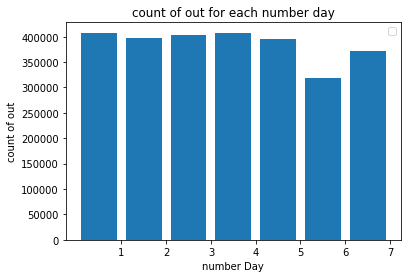

In [120]:
plt.bar(np.arange(len(week_go.iloc[:,1])), week_go.iloc[:,1])

plt.xlabel('number Day')
plt.ylabel('count of out')
plt.title('count of out for each number day')
plt.xticks(np.arange(len(week_go.iloc[:,0]))+0.5, week_go.iloc[:,0])
plt.legend();

***

# 3. สายการบินไหนมีเที่ยวบินมากที่สุดและน้อยที่สุด

**จากตาราง merged_data เราจะหาสายการบินมากที่สุดจากการ Group by สายการบิน โดยใช้ . count ในการนับ**

In [47]:
merged_data.groupby('สายการบิน').count()

,วันในเดือน,วันในสัปดาห์,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
สายการบิน,,,,,,,,,,
9E,80031,80031,80031,80031,80031,80031,80031,80031,80031,80031
AA,289855,289855,289855,289855,289855,289855,289855,289855,289855,289855
AS,68555,68555,68555,68555,68555,68555,68555,68555,68555,68555
B6,121906,121906,121906,121906,121906,121906,121906,121906,121906,121906
DL,381657,381657,381657,381657,381657,381657,381657,381657,381657,381657
EV,157928,157928,157928,157928,157928,157928,157928,157928,157928,157928
F9,35738,35738,35738,35738,35738,35738,35738,35738,35738,35738
FL,92702,92702,92702,92702,92702,92702,92702,92702,92702,92702
HA,17432,17432,17432,17432,17432,17432,17432,17432,17432,17432


**ผลจากกาการใช้คำสั่ง merged_data.groupby('สายการบิน').count() พบว่า**

**วันในเดือนนั้นจะนับทีละ 1 ครั้งนับไปเรื่อยๆจากคำสั่ง count หมายความว่าหากค่าวันเดือนในเดือนมาก สายการบินนั้นจะมีเที่ยวบินที่มากที่สุด**



**เราจะใช้ให้ค่า sort values เป็น วันในเดือน โดยให้ค่า ascending เป็น False เพื่อให้เรียงจากมากลงไปน้อย**

In [50]:
summary = merged_data.groupby('สายการบิน').count().sort_values(by=['วันในเดือน'],ascending=False)
summary

,วันในเดือน,วันในสัปดาห์,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
สายการบิน,,,,,,,,,,
WN,575739,575739,575739,575739,575739,575739,575739,575739,575739,575739
DL,381657,381657,381657,381657,381657,381657,381657,381657,381657,381657
AA,289855,289855,289855,289855,289855,289855,289855,289855,289855,289855
UA,286418,286418,286418,286418,286418,286418,286418,286418,286418,286418
US,233321,233321,233321,233321,233321,233321,233321,233321,233321,233321
OO,160164,160164,160164,160164,160164,160164,160164,160164,160164,160164
EV,157928,157928,157928,157928,157928,157928,157928,157928,157928,157928
B6,121906,121906,121906,121906,121906,121906,121906,121906,121906,121906
MQ,113212,113212,113212,113212,113212,113212,113212,113212,113212,113212


**จากผลที่ได้จะพบว่าสายการบิน WN มีเที่ยวบินที่มากสุดจำนวน 575739 ครั้งและสายการบิน HA มีเที่ยวบินที่น้อยที่สุดจำนวน 17432 ครั้ง สามารถสรุปออกมาได้ดังนี้**

In [52]:
max = summary.iloc[:1,:1]
max

,วันในเดือน
สายการบิน,
WN,575739


สายการบิน WN มีเที่ยวบินที่มากสุดจำนวน 575739 ครั้ง

In [55]:
min = summary.iloc[15:16,:1]
min

,วันในเดือน
สายการบิน,
HA,17432


สายการบิน HA มีเที่ยวบินที่น้อยที่สุดจำนวน 17432 ครั้ง 

***

## ข้อคิดเอง. สายการบิน 3 อันดับแรกที่บินวันในเดือน 1 มากที่สุด


**เรากำหนดเงื่อนไขว่าค่าของ วันในเดือน = 1 ก่อน โดยให้ตัวแปลเป็น day1**




In [63]:
day1 = merged_data[merged_data['วันในเดือน']==1]
day1

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
13861,1,1,AA,11298,14683,-3,-14,11298,Dallas/Fort Worth,TX,Dallas/Fort Worth International
13891,1,1,AA,11298,13871,-4,-1,11298,Dallas/Fort Worth,TX,Dallas/Fort Worth International
13917,1,1,AA,13495,11298,-7,-17,13495,New Orleans,LA,Louis Armstrong New Orleans International
13918,1,1,AA,11298,13851,-6,-7,11298,Dallas/Fort Worth,TX,Dallas/Fort Worth International
13919,1,1,AA,10693,11298,-4,-1,10693,Nashville,TN,Nashville International
...,...,...,...,...,...,...,...,...,...,...,...
2683918,1,2,AA,10693,12892,-12,-32,10693,Nashville,TN,Nashville International
2683975,1,2,AA,12451,11298,-11,-21,12451,Jacksonville,FL,Jacksonville International
2684006,1,2,AA,14679,11298,-5,-9,14679,San Diego,CA,San Diego International
2684035,1,2,AA,14524,11298,-8,-26,14524,Richmond,VA,Richmond International


**จากตาราง day1 เราจะหาสายการบินมากที่สุดจากการ Group by สายการบิน โดยใช้ . count ในการนับ**

In [64]:
day1.groupby('สายการบิน').count()

,วันในเดือน,วันในสัปดาห์,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
สายการบิน,,,,,,,,,,
9E,2386,2386,2386,2386,2386,2386,2386,2386,2386,2386
AA,9180,9180,9180,9180,9180,9180,9180,9180,9180,9180
AS,2223,2223,2223,2223,2223,2223,2223,2223,2223,2223
B6,3924,3924,3924,3924,3924,3924,3924,3924,3924,3924
DL,11798,11798,11798,11798,11798,11798,11798,11798,11798,11798
EV,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733
F9,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112
FL,3032,3032,3032,3032,3032,3032,3032,3032,3032,3032
HA,556,556,556,556,556,556,556,556,556,556


**เราจะใช้ให้ค่า sort values เป็น วันในเดือน โดยให้ค่า ascending เป็น False เพื่อให้เรียงจากมากลงไปน้อย**

In [66]:
sum = day1.groupby('สายการบิน').count().sort_values(by=['วันในเดือน'],ascending=False)
sum

,วันในเดือน,วันในสัปดาห์,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
สายการบิน,,,,,,,,,,
WN,18279,18279,18279,18279,18279,18279,18279,18279,18279,18279
DL,11798,11798,11798,11798,11798,11798,11798,11798,11798,11798
AA,9180,9180,9180,9180,9180,9180,9180,9180,9180,9180
UA,8917,8917,8917,8917,8917,8917,8917,8917,8917,8917
US,7276,7276,7276,7276,7276,7276,7276,7276,7276,7276
OO,4907,4907,4907,4907,4907,4907,4907,4907,4907,4907
EV,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733
B6,3924,3924,3924,3924,3924,3924,3924,3924,3924,3924
MQ,3554,3554,3554,3554,3554,3554,3554,3554,3554,3554


**จากผลที่ได้จะพบว่าสายการบิน WN มีเที่ยวบินที่มากสุดอันดับ 1 ของวันในเดือนที่ 1 ด้วยจำนวน 18279 ครั้ง รองลงมาด้วย DL จำนวน 11798 ครั้งและอันดับที่ 3 สายการบิน AA ด้วยจำนวน 9180 ครั้งสามารถสรุปออกมาได้ดังนี้**

In [70]:
maxday1 = sum.iloc[:3,:1]
maxday1

,วันในเดือน
สายการบิน,
WN,18279
DL,11798
AA,9180
